# 第3章

## scikit-learnの活用

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

## sklearnを使ったパーセプトロンのトレーニング

In [7]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(max_iter = 40, tol = 1e-3, eta0 = 0.1, random_state = 0, shuffle = True)
ppn.fit(X_train_std, y_train)

y_pred = ppn.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 4


In [8]:
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.91


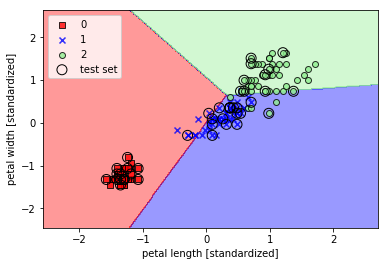

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import pdr
import importlib
importlib.reload(pdr)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

pdr.plot_decision_regions(X = X_combined_std, y = y_combined, classifier = ppn, test_idx = range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc = 'upper left')
plt.show()

## ロジスティック回帰を使ったクラスの確率のモデリング

### sigmoid関数のプロット

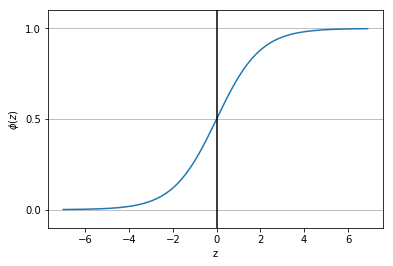

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)
plt.plot(z, phi_z)

# 垂直線の追加(z = 0)
plt.axvline(0.0, color = 'k')

plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')

#  y軸のメモリ追加
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.show()

### ロジスティック回帰モデルのトレーニング

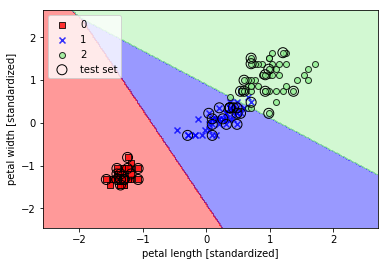

In [18]:
from sklearn.linear_model import LogisticRegression
import pdr

lr = LogisticRegression(C = 1000.0, random_state = 0, solver = 'liblinear', multi_class = 'auto')
lr.fit(X_train_std, y_train)

pdr.plot_decision_regions(X_combined_std, y_combined, classifier = lr, test_idx = range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc = 'upper left')
plt.show()

### 正則化

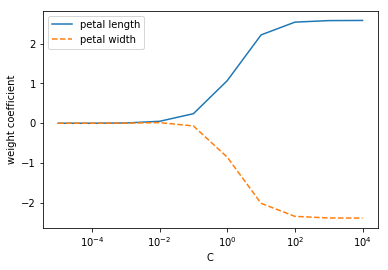

In [21]:
weights, params = [], []
for c in np.arange(-5, 5):
    lr = LogisticRegression(C = 10.**c, random_state = 0, solver = 'liblinear', multi_class = 'auto')
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)
    
weights = np.array(weights)
plt.plot(params, weights[:, 0], label = 'petal length')
plt.plot(params, weights[:, 1], linestyle = '--', label = 'petal width')

plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc = 'upper left')

plt.xscale('log')
plt.show()

##  サポートベクターマシーン

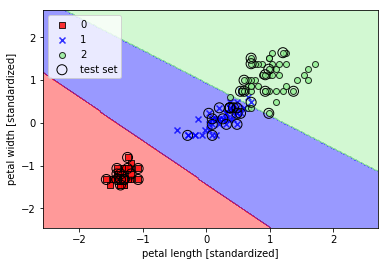

In [22]:
from sklearn.svm import SVC
import pdr

svm = SVC(kernel = 'linear', C = 1.0, random_state = 0)
svm.fit(X_train_std, y_train)

pdr.plot_decision_regions(X_combined_std, y_combined, classifier = svm, test_idx = range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc = 'upper left')
plt.show()

### scikit-learnでの代替実装

In [9]:
from sklearn.linear_model import SGDClassifier
# ppn = SGDClassifier(loss = 'perceptron')
# lr = SGDClassifier(loss = 'log')
# svm = SGDClassifier(loss = 'hinge')

## カーネルSVMを使った非線形問題

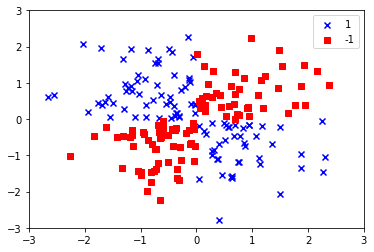

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(0)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)
plt.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor == 1, 1], c = 'b', marker = 'x', label = '1')
plt.scatter(X_xor[y_xor == -1, 0], X_xor[y_xor == -1, 1], c = 'r', marker = 's', label = '-1')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc = 'best')
plt.show()

## カーネルトリックを使って分離超平面を高次元で特定

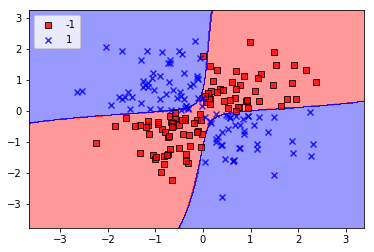

In [24]:
from sklearn.svm import SVC
import pdr

svm = SVC(kernel = 'rbf', gamma = 0.10, C = 10.0, random_state = 0)
svm.fit(X_xor, y_xor)

pdr.plot_decision_regions(X_xor, y_xor, classifier = svm)
plt.legend(loc = 'upper left')
plt.show()

### ガンマパラメータ：カットオフ

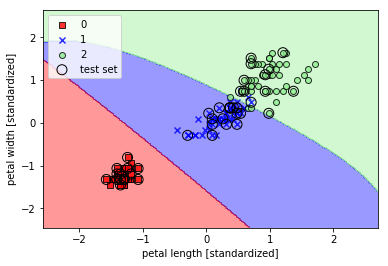

In [25]:
from sklearn.svm import SVC
import pdr

svm = SVC(kernel = 'rbf', gamma = 0.2, C = 1.0, random_state = 0)
svm.fit(X_train_std, y_train)

pdr.plot_decision_regions(X_combined_std, y_combined, classifier = svm, test_idx = range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc = 'upper left')
plt.show()

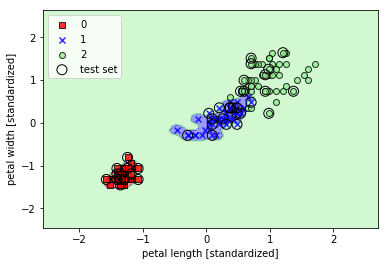

In [26]:
from sklearn.svm import SVC
import pdr

svm = SVC(kernel = 'rbf', gamma = 100, C = 1.0, random_state = 0)
svm.fit(X_train_std, y_train)

pdr.plot_decision_regions(X_combined_std, y_combined, classifier = svm, test_idx = range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc = 'upper left')
plt.show()

## 不純度の比較

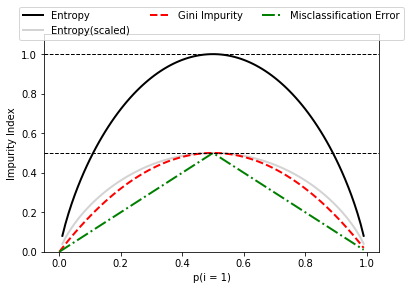

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def gini(p):
    return (p) * (1 - p) + (1 - p) * (1 - (1 - p))

def entropy(p):
    return - p * np.log2(p) - (1 - p) * np.log2(1 - p)
    
def error(p):
    return 1 - np.max([p, 1 -p])

x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e * 0.5 if e else None for e in ent]
err = [error(i) for i in x]
fig = plt.figure()
ax = plt.subplot(111)

for i , lab, ls, c, in zip([ent, sc_ent, gini(x), err], 
                          ['Entropy', 'Entropy(scaled)', 'Gini Impurity', 'Misclassification Error'],
                          ['-', '-', '--', '-.'],
                          ['black', 'lightgray', 'red', 'green', 'cyan']):
    line = ax.plot(x, i, label = lab, linestyle = ls, lw = 2, color = c)
    
ax.legend(loc = 'upper center', bbox_to_anchor = (0.5, 1.15), ncol = 3, fancybox = True, shadow = False)
ax.axhline(y = 0.5, linewidth = 1, color = 'k', linestyle = '--')
ax.axhline(y = 1.0, linewidth = 1, color = 'k', linestyle = '--')

plt.ylim([0, 1.1])
plt.xlabel('p(i = 1)')
plt.ylabel('Impurity Index')
plt.show()

## 決定木の構築

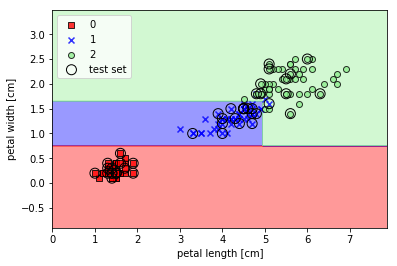

In [28]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy', max_depth = 3, random_state = 0)
tree.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
pdr.plot_decision_regions(X_combined, y_combined, classifier = tree, test_idx = range(105, 150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc = 'upper left')
plt.show()

### dotファイルの作成

In [29]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file = 'tree.dot', feature_names =['petal length', 'petal width'])

## ランダムフォレスト

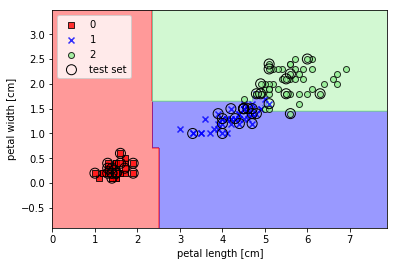

In [30]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='entropy', n_estimators = 10, random_state = 1, n_jobs = 2)
forest.fit(X_train, y_train)
pdr.plot_decision_regions(X_combined, y_combined, classifier = forest, test_idx = range(105, 150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc = 'upper left')
plt.show()

## K近傍法：怠惰学習アルゴリズム

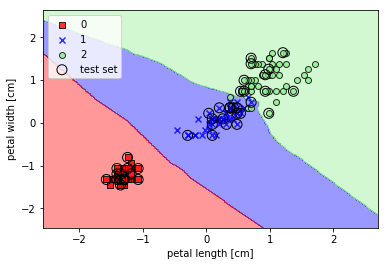

In [31]:
from sklearn.neighbors import KNeighborsClassifier

X_combined_std = np.vstack((X_train_std, X_test_std))
knn = KNeighborsClassifier(n_neighbors = 5, p = 2, metric = 'minkowski')
knn.fit(X_train_std, y_train)
pdr.plot_decision_regions(X_combined_std, y_combined, classifier = knn, test_idx = range(105, 150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc = 'upper left')
plt.show()